# Chapter 4: Interest Rates

# 4.1 Type of Rates

One important factor influencing interest rates is credit risk, the higher it is, the higher the interest rate that is promised by the borrower.
The extra amount added to a risk-free investment to allow for credit risk is called **credit spread**.

Interest rates are often expressed in basis points. One basis point is 0.01% per annum.

## Treasury Rates
Treasury rates are rates that an investor earns on Treasury bills and Treasury bonds. These are the instruments used by a government to borrow in its own currency

## Overnight Rates

Banks are required to maintain a certain amount of cash, known as a reserve, with the central bank. The reserve requirement for a bank at any time depends on its outstanding
assets and liabilities. At the end of a day, some financial institutions typically have surplus funds in their accounts with the central bank while others have requirements for funds. This leads to borrowing and lending overnight

**Overnight rate** is called the federal funds rate. 
**effective federal funds rate**: weighted average of the rates in brokered transactions (with weights being determined by the size of the transaction)

This overnight rate is monitored by the Federal Reserve, which may intervene with its own transactions in an attempt to raise or lower it.


## Repo rates
Repo rates are secured borrowing rates.
In a repo (or repurchase agreement), a financial institution that owns securities agrees to sell the securities for a certain price and buy them back at a later time for a slightly higher price.

The **secured overnight financing rate (SOFR)** is an important volume-weighted median
average of the rates on overnight repo transactions in the United States.

# 4.2 Reference Rates

## LIBOR

A problem with LIBOR is that there is not enough borrowing between banks for a
bank’s estimates to be determined by market transactions. As a result, LIBOR sub-­
missions by banks involved a certain amount of judgment and could be subject to
manipulation. Bank regulators are uncomfortable with this and have developed plans
to phase out the use of LIBOR.

## The new Reference Rates
The plan is to base reference rates on the overnight rates.
1. USA: SOFR
2. U.K.: SONIA
3. Eurozone: ESTER
4. Switzerland: SARON
5. Japan: TONAR

Longer rates such as three-month rates, six-month rates, or one-year rates can be determined from overnight rates by compounding them daily.

Suppose that (annualized) SOFR overnight reate on i-th business day of a period is r_i (1 <= i <= n) and the rate applies to d_i days. 

The annualized interest rate for the period is:
\begin{equation*}
  [(1 + r_1 \hat{d}_1)(1 + r_2 \hat{d}_2) \cdot (1 + r_n \hat{d}_n) - 1] \frac{360}{D}
\end{equation*}

On most days, $d_i = 1$, but weekends and holidays lead to the overnight rates being applied to more than one day.

The new reference rates are regarded as risk-free because they are derived from one-day loans to creditworthy financial institutions. LIBOR, by contrast, incorporates a credit spread. LIBOR rates are forward looking. They are determined at the beginning of the period to which they will apply. The new reference rates are backward looking. The rate applicable to a particular period is not known until the end of the period when all the relevant overnight rates have been observed.

In [1]:
import numpy
# r_i = []
# d_i = []

# annualized_int_rate = np.product()

## Reference Rates and Credit Risk
One problem faced by banks is that credit spreads in the economy increase in stressed market conditions. For example, the spread between three-month LIBOR and a three-month rate based on overnight rates is usually about 10 basis points (0.1%), but it can be much higher in stressed market conditions. For example, it spiked to an all-time
high of 364 basis points (3.64%) in the United States in October 2008 during the financial crisis. If a bank offers a loan at a reference rate plus x%, where x is a constant,
it would like the rate to reflect ups and downs in average credit spreads. LIBOR, when used as a reference rate, did this, but the new reference rates (because they are
essentially risk-free) do not. This has led banks to ask for a way of creating risky reference rates by adding a credit spread to the new reference rates. There have been a
number of proposals and the new risk-free reference rates may be augmented by credit spread measures in the future.

# 4.3 The Risk-Free Rate

The usual approach to valuing derivatives involves setting up a riskless portfolio and arguing that the return on the portfolio should be the risk-free rate. The
risk-free rate therefore plays a central role in derivatives pricing.

Derivatives traders do not use rates on T-bills nad T-bonds as risk free rates. This is because there are tax and regulatory factors that lead to Treasury rates being artificially low. For example:
1. Banks are not required to keep capital for investments in a Treasury instruments, but they are required to keep capital for other very low risk instruments.
2. In the United States, Treasury instruments are given favorable tax treatment compared with other very low risk instruments because the interest earned by investors is not taxed at the state level.

# 4.4 Measuring Interest Rates
Compounding frequency affects the value of the total interest, for an example of a principal of $100 and interest rate of 10% at the end of 1 year:
- Annually (m=1): 110.00
  Semiannually (m=2): 110.25
- Quaterly (m=4): 110.38
- Monthly (m=12): 110.47
- Weekly (m=52): 110.51
- Daily (m=365): 110.52

Terminal value of investement with $R$ interest rate, principal amount $A$, and compounded $m$ times per annum for $n$ years:
\begin{equation*}
  A(1 + \frac{R}{m})^{mn}
\end{equation*}

When m = 1, the rate is sometimes referred to as the equivalent annual interest rate

## Continuous Compounding

The limit as the compounding frequency, m, tends to infinity is known as continuous compounding.
With continuous compoudning, it can be shown that an amount A invested for n years at rate R grows to:

\begin{equation*}
  Ae^{Rn}
\end{equation*}


In [2]:
import numpy as np

# For A = 100, R = 0.1, n = 1.
val_after_continuous_compounding = 100 * np.exp(0.1 )
print("Value after continuous compounding: ", val_after_continuous_compounding)

Value after continuous compounding:  110.51709180756477


For most practical purposes, continuous compounding can be thought of as being equivalent to daily compounding.

To convert a rate with compounding frequency of m times per annum to a continuously compounded rate and vice versa:

\begin{equation*}
\begin{split}
  R_m &=  m (e^{\frac{R_c}{m}} - 1) \\
  R_c &=  m\ ln (1 + \frac{R_m}{m})
\end{split}
\end{equation*}



In [3]:
def fixedToContinuousCompound(R_m, m):
  return m * np.log(1 + R_m /m)

def continuousToFixedCompound(R_c, m):
  return m * (np.exp(R_c/m) - 1)

print("Interest rate that is 10% per annum with semiannual compounding: ", 
      fixedToContinuousCompound(0.1, 2))
print("8% continuous compounding and interest paid quarterly : ", 
      continuousToFixedCompound(0.08, 4))

Interest rate that is 10% per annum with semiannual compounding:  0.0975803283388641
8% continuous compounding and interest paid quarterly :  0.0808053601070231


# 4.5 Zero Rates
The n-year zero-coupon interest rate is the rate of interest earned on an investment that starts today and lasts for n years.

All the interest and principal is realized at the end of n years. There are no intermediate payments.

The n-year zero-coupon interest rate is also known as the n-year spot rate/the n-year zero rate/ n-year zero.

Suppose a 5-year zero rate with continuous compounding is quoted as 5% per annum. This means that $100, if invested for 5 years, grows to:
\begin{equation*}
  100 e^{0.05 \times 5} = 128.40
\end{equation*}


Most of the interest rates we observe directly in the market are not pure zero rates.



# 4.6 Bond Pricing

Most bonds pay coupons to the holder periodically. The bond’s principal (which is also known as its par value or face value) is paid at the end of its life.
The theoretical price of a bond can be calculated as the present value of all the cash flows that will be received by the owner of the bond. Sometimes bond traders use the same discount rate for all the cash flows underlying a bond, but a more accurate approach is to use a different zero rate for each cash flow.

A more accurate approach is to use a different zero rate for each cash flow. 
Suppose that a 2-year bond with a principal of $100 provides coupons at the rate of 6% per annum semiannually. 
- To calculate the present value of the first coupon of $3, we discount it at 5.0% for 6 months.
- to calculate the present value of the second coupon of $3, we discount it at 5.8% for 1 year; and so on

\begin{equation*}
  3 e^{-0.05 \times 0.5} + 3 e^{-0.058 \times 1.0} + 3 e^{-0.064 \times 1.5} + 103 e^{-0.068 \times 2.0} = 98.39
\end{equation*}

| Maturity (years)   | Zero Rate (%) |
| -------- | ------- |
| 0.5  | 5.0    |
| 1.0 |  5.8    |
| 1.5    | 6.4    |
| 2.0    | 6.8    |

## Bond Yield

A bond's yield is the single discount rate that, when applied to all cash flows, gives a bond price equal to the market price. 

Suppose that the theoreticdal price fo the bond we have been considering is $98.39, is also it's market value.

If y is the yield on the bond, expressed with continuous compounding, it must be true that 
\begin{equation*}
  3 e^{-y \times 0.5} + 3 e^{-y \times 1.0} + 3 e^{-y \times 1.5} + 103 e^{-y \times 2.0} = 98.39
\end{equation*}

Solving for y using a method like Newton-Rahpson, we get $y= 6.76\%$

# Par Yield
The par yield for a certain bond maturity is the coupon rate that causes the bond price to equal its par value. (par value is same as the principal value).

Suppose that the coupon on a 2-year bond in
our example is c per annum (or 0.5 c per 6 months). Using the zero rates in Table 4.2, the
value of the bond is equal to its par value of 100 when
\begin{equation*}
  \frac{c}{2} e^{-0.05 \times 0.5} + \frac{c}{2} e^{-0.058 \times 1.0} + \frac{c}{2} e^{-0.064 \times 1.5} + (100 + \frac{c}{2}) e^{-0.068 \times 2.0} = 100
\end{equation*}
The 2-year par yield is therefore c=6.87% per annum.

More generally, if d is the present value of $1 received at the maturity of the bond, A is the value of an annuity that pays one dollar on each coupon payment date, and m is the number of coupon payments per year, then the par yield c must satisfy
\begin{equation*}
  100 = A \frac{c}{m} + 100 d
\end{equation*}
so that 
\begin{equation*}
  c = \frac{(100 - 100d) m}{A}
\end{equation*}

In our example: 
- $m=2$
- $d = e^{-0.068 \times 2} = 0.87284$
- $A = e^{-0.05 \times 0.5} + e^{-0.058 \times 1.0} + e^{-0.064 \times 1.5} + e^{-0.068 \times 2.0} = 3.70027$

The formula confirms that the par yield is $6.87\%$ per annum.

# Determining zero rates

| Bond principal ($) | Time to maturity (years) | Annual Coupon ($) | Bond Price ($) | Bond yield (%) |
| --------| ------- |------- |------- |------- |
| 100     | 0.25    | 0   | 99.6  | 1.6064(Q)   |
| 100     | 0.50    | 0   | 99.0 |   2.0202(QA)  |
| 100     | 1.00    | 0   | 97.8  |  2.2495(A)   |
| 100     | 1.50    | 4   | 102.5  |   2.2949(SA)  |
| 100     | 2.00    | 5   | 105.0 |  2.4238 (SA)   |

In [4]:
# First 3 bonds pay no coupon, and therefore zero rates can be easily calculated
# First Bond: 100 = 99.6 * np.exp(R * 0.25)
def noCouponZeroRate(p, A, T):
  """Calculates the zero rate for a no-coupon bond
    p: price
    A: principal
    T: Time to maturity (years)
  """
  return (1/T) * np.log(A/p)
  
print("1st bond zero rate: ", noCouponZeroRate(99.6, 100, 0.25))
print("2nd bond zero rate: ", noCouponZeroRate(99.0, 100, 0.5))
print("3rd bond zero rate: ", noCouponZeroRate(97.8, 100, 1.00))

1st bond zero rate:  0.01603208559015547
2nd bond zero rate:  0.020100671707003012
3rd bond zero rate:  0.022245608947319737


The fourth bond last 1.5 years with cash flow:
- 6 months: $2
- 1 year: $2
- 1.5 years: $102

From earlier calculations:
- Discount rate for 6 months: 2.010%
- Discount rate for 1 year: 2.225%

It follows that:
\begin{equation*}
  2 e^{-0.0201 \times 0.5} + 2 e^{-0.02225 \times 1.0} + 102 e^{R \times 1.5} = 98.39
\end{equation*}

In [5]:
def withCouponZeroRate(p, A, T, annual_coupon, pay_period, discount_rates):
  """Calculates the zero rate for a bond that pays coupons
    p: bond price
    A: bond principal
    T: Time to maturity (years)
    annual_coupon: [$] Annual coupon
    pay_period: [years] coupon payment frequency
    discount_rates: Array of discount rates
  """
  l_val = -p 
  coupon = annual_coupon * pay_period
  i = 0
  for t in np.arange(pay_period, T, pay_period):
    l_val += coupon * np.exp(-discount_rates[i] * t)
    i += 1

  return -np.log(l_val/(- (A + coupon)))/T

print("4th bond zero rate: ", 
        withCouponZeroRate(102.5, 100, 1.5, 4, 0.5, [0.020100, 0.02224]))

print("5th bond zero rate: ", 
        withCouponZeroRate(105.0, 100, 2.0, 5, 0.5, [0.020100, 0.02224, 0.0228445]))

4th bond zero rate:  0.022844565309012226
5th bond zero rate:  0.024163861169992557


A chart showing the zero rate as a function of maturity is known as the zero curve. 
Some assumptions:
1. zero curve is linear between the points determined using the bootstrap method.
2. zero curve is horizontal prior to the first point and horizontal beyond the last point

Usually we do not usually have bonds with maturities equal to exactly 1.5 years, 2 years, 2.5 years, and so on. One approach is to interpolate between data points. We can use linear piecewise curve or fit a spline function

# Forward rates
Forward interest rates are the rates of interest implied by current zero rates for periods of time in the future. Rates are assumed to be continuously compounded.

Illustration:
1. 3% per annum rate for 1 year means that, in return for an investment of $100 today, an amount $100 e^{0.03 \times 1} = $103.05$ is received in 1 year
1. 4% per annum rate for 2 years means that, in return for an investment of $100 today, an amount $100 e^{0.04 \times 2} = $108.33$ is received in 2 years
2. The forward interest rate in Table 4.5 for year 2 is 5% per annum. THis is the rate of interest that is implied by the zero rates for the period of time BETWEEN the end of the first year and end of the second year.

\begin{equation*}
  100 e^{0.03 \times 1} e^{0.05 \times 1} = 100 e^{0.04 \times 2} = \$108.33
\end{equation*}

| Year (n) | Zero rate for an n-year investment (% per annum)   | Forward rate for nth year (% per annum) |
| ----- | -------- | ------- |
| 1 | 3.0  |     |
| 2 | 4.0  | 5.0    |
| 3 | 4.6 |  5.8    |
| 4 | 5.0    | 6.2    |
| 5 | 5.3    | 6.5    |

0.03: 1.0
0.04: 2.0
0.046: 3.0
0.05: 4.0
0.053: 5.0
[97.04455335485082, 92.31163463866358, 87.10986917457984, 81.87307530779819, 76.72059499758556]


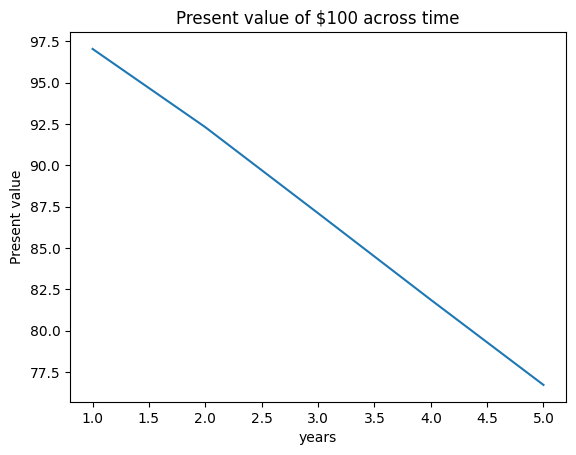

In [32]:
import matplotlib.pyplot as plt

L = 100.0 # Principal

# R: Zero rates from year 1 to 5
R = [0.03, 0.040, 0.046, 0.05, 0.053]

t_i = np.arange(1.0, 5.1, 1.0) # 0 to 10 years

y = []
for i in range(0, len(R)):
  print(f"{R[i]}: {t_i[i]}")
  y.append(L * np.exp(-R[i] * t_i[i]))

print(y)

plt.plot(t_i, y)
plt.title("Present value of $100 across time")
plt.xlabel("years")
plt.ylabel("Present value")

plt.show()

In general:
- $R_1$: zero rate for maturity $T_1$
- $R_2$: zero rate for maturity $T_2$
- $R_F$: Forward interest rate for the period of time between $T_1$ and $T_2$, then

\begin{equation*}
\begin{split}
  R_F &= \frac{R_2 T_2 - R_1 T_1}{T_2 - T_1} \\
  R_F &= R_2 + (R_2 - R_1) \frac{T_1}{T_2 - T_1} 
\end{split}
\end{equation*}


We can also take the limit as $T_2$ approaches $T_1$ and letting the common value of the two be T, then we obtain:
\begin{equation*}
\begin{split}
  R_F &= R + T \frac{\partial R}{\partial T}
\end{split}
\end{equation*}
where R is the zero rate for a maturity of T.

The value of $R_F$ obtained is known as the instantaneous forward rate. This is the forward rate that is applicable to a very short future time period that begins at time T.

Define $P(0, T)$ as the price of a zero-coupon bond maturing at time T. Because $P(0, T) = e^{-RT}$, the equation for the instantaneous forward rate can also be written as:
\begin{equation*}
  R_F = \frac{\partial }{\partial T} ln \ P(0,T)
\end{equation*}

If a large financial institution can borrow or lend at the rates in Table 4.5, it can lock in
the forward rates. For instance:
- Borrow $100 at 3% for 1 year. 
  - **Cash outflow** $100 e^{0.03 \times 1} = \$103.05$ at end of year 1
- Invest the money at 4% for 2 years. 
  - **Cash inflow** of $100 e^{0.04 \times 2} = \$108.33$ at end of year 2.
- A return equal to forward rate (5%) is then earned on $103.05 during the second year. 

# 4.9 Forward Rate Agreements
A forward rate agreement (FRA) is an agreement to exchange a predetermined fixed rate for a reference rate that will be observed in the market at a future time. Both rates are applied to a specified principal, but the principal itself is not exchanged.

Consider an agreement to exchange 3% for 3-month LIBOR in 2 years with both rates being applied to a principal of $100 million.
- Party A pays LIBOR and receive fixed rate of 3%.
  - Lends with LIBOR and borrow at 3% 
- Party B receives LIBOR and pay the fixed rate of 3%
  - Borrow at LIBOR and lend with 3%

If LIBOR is 3.5% in 2 years:
- Party A receives $100,000,000 x (0.035 - 0.03) x 0.25 = $125,000
  - The payment would be due at time 2.25 years
  - In practice, because LIBOR is determined in advance of a period, the payment would be made at time 2 years and equal to the present value of $125,000 discounted for 3 months at 3.5%

When an FRA is first set up, the fixed rate == forward rate, so it's value is zero. As time passes, the forward rate is liable to change.
Suppose that at a particular time, we defined:
- $R_k$: Fixed rate agreed to in the FRA
- $R_F$: Current forward rate for the reference rate
- $\tau$: Period of time to which the rates apply (3 months in the above example)
- $L$: Principal in the contract

We can compare:
1. The FRA under consideration
2. A similar FRA where the fixed rate is the forward rate, $R_F$

For the party receiving the fixed rate (i.e. borrowing at fixed rate), the only difference between the two FRAs is that:
1. The cash flow at maturity for the first FRA is $\tau (R_K - R_F) L $ more than that for the second FRA 
2. We know that second FRA is worth zero.
3. First FRA is worth the present value of $\tau (R_K - R_F) L $. Similarly for the party that pays the fixed rate, the FRA is worth the present value of $\tau (R_F - R_K) L $

An important implication: **FRA can be valued by assuming that the forward interest rate for the underlying reference rate will be the one that determines the exchange**

**Example 4.3**

Suppose that:
1. Forward SOFR rate for the period between time 1.5 years and time 2 years in the future is 5%
2. Some time ago, a company entered into an FRA where it will receive 5.8% (with semi-annual compounding) and pay SOFR on a principal of $100 million for the period. 
3. The 2-year (SOFR) risk free rate is 4% (continuous compounding)

The value of the FRA is:

In [16]:
def computeFRAValue(L, R_F, R_K, tau, pay_fixed=False):
  """Compute FRA Value

  Args:
      L (_type_): Principal
      R_F (_type_): Current forward rate for the reference rate 
      R_K (_type_): Fixed rate agreed to in the FRA
      tau (_type_): [years] Period of time to which the rates apply
      pay_fixed (bool): If true, calculate for party paying the fixed rate (lending), else party is receiving the fixed rate (i.e. borrowing)
  """
  fra_val = tau * (R_K - R_F ) * L 
  if (pay_fixed):
    fra_val = -fra_val
  
  return fra_val

# Get Present value discounted?  
FRA_val = computeFRAValue(L=100000000, R_F=0.05 , R_K=0.058, tau=0.5, pay_fixed=False)
# Discount present value!
FRA_present_value = FRA_val * np.exp(-0.04 * 2.0)
print("FRA PRESENT VALUE: ", FRA_present_value)

FRA PRESENT VALUE:  369246.5385546543


# 4.10 DURATION
The duration of a bond: a measure of how long the holder of the bond has to wait **before receiving the present value** of the cash payments:
- A zero-­coupon bond that lasts n years has a duration of n years.
- However, a coupon-bearing bond lasting n years has a duration of less than n years, because the holder receives some of the cash payments prior to year n.

Suppose that bond provides the holder with cash flows $c_i$ at time $t_i$, $1 \leq i \leq n$. The bond price $B$ and the bond yield $y$ (continuously compounded) are related by:
\begin{equation*}
  B = \sum_{i=1}^{n} c_i e^{-y t_i}
\tag{4.7}
\end{equation*}

Then, the duration of the bond is defined as:
\begin{equation*}
\begin{split}
  D &= \frac{\sum_{i=1}^{n} t_i c_i  e^{-y t_i} }{B} \\
    &= \sum_{i=1}^{n} t_i  \left[ \frac{c_i  e^{-y t_i} }{B} \right]
\end{split}
\tag{4.8}
\end{equation*}
The duration is therefore a weighted avaerage of the times when payment are made:
- Weight applied to time $t_i$ being equal to proportion of the bond's total present value provided by the cash flow at time $t_i$. 
- Sum of the weights is 1.0

When a small change $\Delta y$ in the yield is considered, it is approximately true that:
\begin{equation*}
  \Delta B = \frac{d B}{dy} \Delta y
\tag{4.9}
\end{equation*}
From equation (4.7), this becomes:
\begin{equation*}
  \Delta B = - \Delta y \sum_{i=1}^{n} c_i t_i e^{-y t_i}
\tag{4.10}
\end{equation*}

> There is a negative relationship between B and y. When bond yields increase, bond prices decrease, and vice versa.

From equation (4.8) and (4.10), the key duration relationship is obtained:
\begin{equation*}
  \Delta B = - B D \Delta y 
\tag{4.11}
\end{equation*}
Which can be written as:
\begin{equation*}
  \frac{\Delta B}{B} = - D \Delta y 
\tag{4.12}
\end{equation*}

> Equation (4.12) is an approximate relationship between percentage changes in a bond price and changes in its yield. 

**Example 4.4** 
Consider a 3-year 10% coupon bond with a face value of $100. Suppose that the yield on the bond is 12% per annum with continuous compounding. 
- This means that y=0.12
- Coupon payments of $5 are made every 6 months.

Table 4.6:
| Time (years) | Cash flow ($) | Present Value | Weight | Time x weight |
| --------| ------- |------- |------- |------- |
| 0.5     | 5    | $5e^{-0.12 \times 0.5} = 4.709$   | 0.050  | 0.025   |
| 1.0     | 5    | $5e^{-0.12 \times 1.0} = 4.435$   | 0.047 |   0.047  |
| 1.5     | 5    | $5e^{-0.12 \times 1.5} = 4.176$   | 0.044  |  0.066   |
| 2.0     | 5    | $5e^{-0.12 \times 2.0} = 3.933$  | 0.042  |   0.083  |
| 2.5     | 5    | $5e^{-0.12 \times 2.5} = 3.704$  | 0.039 |  0.098  |
| 3.0     | 105    | $105e^{-0.12 \times 3.0} = 73.256$ | 0.778 |  2.333  |
| Total     | 130    | Bond Price = 94.213 | 1.000 |  2.653  |

For the bond in Table 4.6, the bond price, B, is 94.213, and the duration D is 3.653, so equation (4.11) gives:
\begin{equation*}
  \Delta B = -249.95 \times \Delta y
\end{equation*}

# Modified Duration
The preceding analysis is based on the assumption that y is expressed with continuous compounding. If y is expressed with annual compounding, it can be shown that the approximate relationship in equation (4.11) becomes

\begin{equation*}
  \Delta B = - \frac{B D \Delta y}{1 + y}
\end{equation*}

More generally, if y is expressed with a compounding frequency of m times per year, then:
\begin{equation*}
  \Delta B = - \frac{B D \Delta y}{1 + y/m}
\end{equation*}

The modified duration, D*, is defined by:
\begin{equation*}
  D* = - \frac{D}{1 + y/m}
\end{equation*}

The duration relationship is then simplified to:
\begin{equation*}
  \Delta B = - B D^* \Delta y
\tag{4.13}
\end{equation*}


# Bond portfolios
The duration, D, of a bond portfolio can be defined as a weighted average of the durations of the individual bonds in the portfolio, with the weights being proportional to the bond prices.
- Equations (4.11) to (4.13) then apply, with B being defined as the value of the bond portfolio. 
- They estimate the change in the value of the bond portfolio for a small change $\Delta y$ in the yields of all the bonds
- when duration is used for bond portfolios, there is an implicit assumption that the yields of all bonds will change by approximately the same amount.
  - When the bonds have widely differing maturities, this happens only when there is a parallel shift in the zero-coupon yield curve.
  - We should therefore interpret equations (4.11) to (4.13) as providing estimates of the impact on the price of a bond portfolio of a small parallel shift, ∆y, in the zero curve

>By choosing a portfolio so that the duration of assets equals the duration of liabilities (i.e., the net duration is zero), a financial institution eliminates its exposure to small parallel shifts in the yield curve. But it is still exposed to shifts that are either large or nonparallel.

# Convexity
The duration relationship applies only to small changes in yields.

For 2 different bond portfolios (X and Y) with similar durations:
- For large yield changes, the portfolios behave differently
- Portfolio X has more curvature in its relationship with yields than portfolio Y. A factor known as convexity measures this curvature and can be used to improve the relationship in equation (4.12).

A measure of convexity is:
\begin{equation*}
  C =  \frac{1}{B} \frac{d^2 B}{dy^2} = \frac{\sum_{i=1}^{n} c_i {t_i}^2 e^{-y t_i}}{B}
\end{equation*}

\begin{equation*}
\begin{split}
  \Delta B &=  \frac{dB}{dy} \Delta y + \frac{1}{2} \frac{d^2 B}{dy^2} \Delta y^2 \\
  \frac{\Delta B}{B}  &=  -D \Delta y + \frac{1}{2} C (\Delta y)^2
\end{split}
\tag{4.14}
\end{equation*}

> By choosing a portfolio of assets and liabilities with a net duration of zero and a net convexity of zero, a financial institution can make itself immune to relatively large parallel shifts in the zero curve. However, it is still exposed to nonparallel shifts.

# 4.12 THEORIES OF THE TERM STRUCTURE OF INTEREST RATES
Simplest theory to explain shape of zero curve: **expectations theory**
- Long-term interest rates should reflect expected future short-term interest rates.
- More precisely, it argues that a forward interest rate corresponding to a certain future period is equal to the expected future zero interest rate for that period.

Another theory, **market segmentation theory**:
- conjectures that there need be no relationship between short-, medium-, and long-term interest rates.
- The short-term interest rate is determined by supply and demand in the short-term bond market; the medium-term interest rate is determined by supply and demand in the medium-term bond market; and so on.

Most appealing theory, **liquidity preference theory**:
- The basic assumption underlying the theory is that investors prefer to preserve their liquidity and invest funds for short periods of time.
- Borrowers, on the other hand, usually prefer to borrow at fixed rates for long periods of time.
- This leads to a situation in which forward rates are greater than expected future zero rates. 
- The theory is also consistent with the empirical result that yield curves tend to be upward sloping more often than they are downward sloping.

# The Management of Net Interest Income

Net interest income of the bank: 
- Excess of the interest received (Borrowed) over the interest paid (Lent)
- Needs to be carefully managed

Consider a simple situation where a bank offers consumers:
1. A one-year and a five-year deposit rate (Interest received)
2. A one-year and five-year mortgage rate. (Interest paid)
3. (EXPECTATIONS THEORY): Assumption is made that expected one-year interest rate for future time perids is equal to the one-year rates prevailing in the market today. 
   1. i.e. market considers interest rate increases to be just as likely as interest rate decreases
   2. Table 4.7 ias fair in that they reflect the market's expectations.
   3. Investing money for one year and reinvesting for four further one-year periods give the same expected overall return as a single five-year investment
   4. Similarly, borrowing money for one year and refinancing each year for the next four years leads to the same expected financing costs as a single five-year loan.
4. When the bank posts the rates shown in Table 4.7, it is likely to find that the majority of its depositors opt for one-year deposits and the majority of its borrowers opt for five- year mortgages. This creates an asset/liability mismatch for the bank and subjects it to risks.


**Table 4.7**
| Maturity (years) | Deposit Rate   | Mortgage rate |
| ----- | -------- | ------- |
| 1 | 3%  | 6% |
| 5 | 3%  | 6% |

It is the job of the asset/liability management group to ensure that the maturities of the assets on which interest is earned and the maturities of the liabilities on which interest is paid are matched. One way it can do this is by increasing the five-year rate on both deposits and mortgages. For example, it could move to the situation in Table 4.8 where the five-year deposit rate is 4% and the five-year mortgage rate 7%.

This may lead to the maturities of assets and liabilities being matched. If there is still an imbalance with depositors tending to choose a one-year maturity and borrowers a five-year maturity, five-year deposit and mortgage rates could be increased even further. Eventually the imbalance will disappear.

**Table 4.8**
| Maturity (years) | Deposit Rate   | Mortgage rate |
| ----- | -------- | ------- |
| 1 | 3%  | 6% |
| 5 | 4%  | 7% |

The net result of all banks behaving in the way we have just described is **liquidity preference theory**.